Name - Vishal Kumar
Roll No - 226101005

Question 1

In [11]:
import numpy as np

a = 2
b = 3
x = np.linspace(-10, 10, num=100)

In [12]:
y = a*x + b #the standard equation format

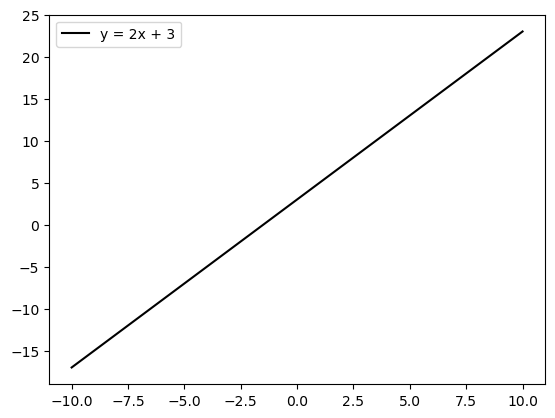

In [13]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'k-', label='y = 2x + 3')
plt.legend()
plt.show()

In [14]:
sigma = 1 #as the variance is given to be 1 hence the standard deviation is 1 as well
noise = np.random.normal(0, sigma, 100)
y_noisy = y + noise

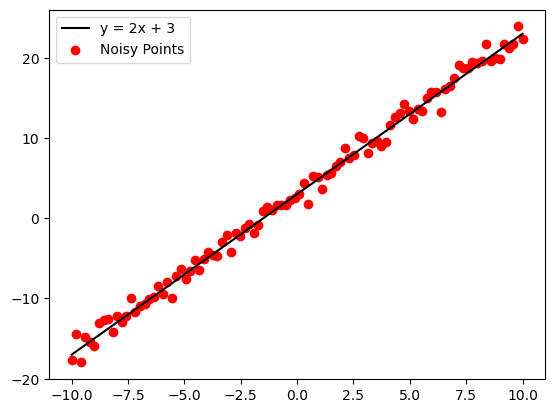

In [15]:
plt.plot(x, y, 'k-', label='y = 2x + 3')
plt.scatter(x, y_noisy, c='r', label='Noisy Points')
plt.legend()
plt.show()

Question 2

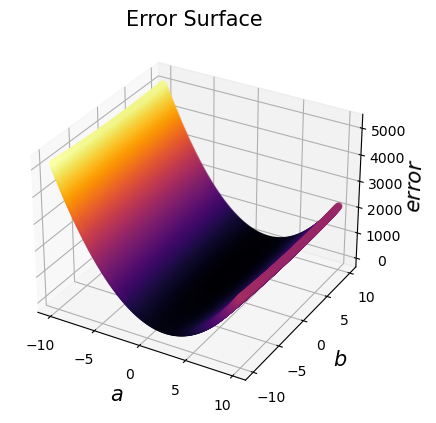

In [7]:
import numpy as np
A=np.arange(-10,10,0.1)
B=np.arange(-10,10,0.1)

def y_i(x, a, b):
     return a*x + b
# Compute element wise error
def compute_error(Y_n, Y_hat):
    e=np.array(Y_n)-Y_hat # element wise error
    return e

# Compute average error
def compute_avg_error(e):
    e_avg=sum(e**2)/len(e) # average error
    return e_avg
#plt.xlim(-10, 10)
X = np.linspace(-10, 10, num = 100)
y = 2*X + 3
sigma = 5
noise = np.random.normal(0, sigma, 100)
y_n = y + noise
# Compute average error values for all combination of a and b.
E_avg=[] # average error
a_b=[]
for a in A:
    for b in B:
        Y_hat= np.array([y_i(x, a, b) for x in X])  
        e=compute_error(y_n, Y_hat) # element wise error
        e_avg=compute_avg_error(e) # average error
        E_avg.append(e_avg)
        a_b.append((a,b))
# (e) plot the error surface with the value os a along x-axis, that of b along y-axis and E along z-axis

# importing mplot3d toolkits, numpy and matplotlib
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axis
x = [a[0] for a in a_b] 
y = [b[1] for b in a_b]
z = np.array(E_avg)
 
# plotting error surface
# ax.plot3D(x,y,z)
ax.scatter3D(x, y, z, c=z, cmap='inferno')
ax.set_xlabel('$a$', fontsize=15)
ax.set_ylabel('$b$', fontsize=15)
ax.set_zlabel('$error$', fontsize=15)

ax.set_title('Error Surface', fontsize=15)
plt.show()

Question 3

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generating the data
np.random.seed(0)
x = np.linspace(-10, 10, 200)
y = 2*x + 3
sigma = 1
noise = np.random.normal(0, sigma, 200)
y_n = y + noise

# Splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_n, test_size=0.5, random_state=0)

# Estimating the values of a and b using the pseudo-inverse approach
X = np.column_stack((x_train, np.ones(len(x_train))))
a_b = np.linalg.pinv(X).dot(y_train)
a = a_b[0]
b = a_b[1]

# Making predictions for the test set
y_hat = a*x_test + b

# Computing the MSE
mse = np.mean((y_test - y_hat)**2)

# Computing the R-squared measure
ss_tot = np.sum((y_test - np.mean(y_test))**2)
ss_res = np.sum((y_test - y_hat)**2)
r_squared = 1 - (ss_res/ss_tot)

# Printing the results
print("a =", a)
print("b =", b)
print("MSE =", mse)
print("R-squared =", r_squared)

a = 1.9899188946957218
b = 3.0965413997218945
MSE = 0.9488685105623506
R-squared = 0.9929773713102942


Question 4

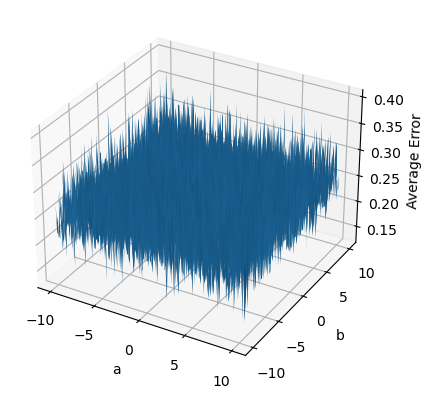

In [18]:
#importing essential libraries

import numpy as np
import matplotlib.pyplot as plt

def generate_points(a, b, x, n, sigma):
    y = a * x + b
    y_noisy = y + sigma * np.random.normal(0, 1, n)
    return y, y_noisy

def average_error(y, y_pred):
    error = y - y_pred
    return np.mean(error ** 2)

a_vals = np.arange(-10, 10.1, 0.1)
b_vals = np.arange(-10, 10.1, 0.1)
x = np.linspace(-10, 10, 100)
n = 100
sigma = 0.5

errors = np.zeros((len(a_vals), len(b_vals)))
for i, a in enumerate(a_vals):
    for j, b in enumerate(b_vals):
        y, y_noisy = generate_points(a, b, x, n, sigma)
        y_pred = a * x + b
        errors[i, j] = average_error(y_noisy, y_pred)

A, B = np.meshgrid(a_vals, b_vals)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, errors)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('Average Error')
plt.show()


Question 5

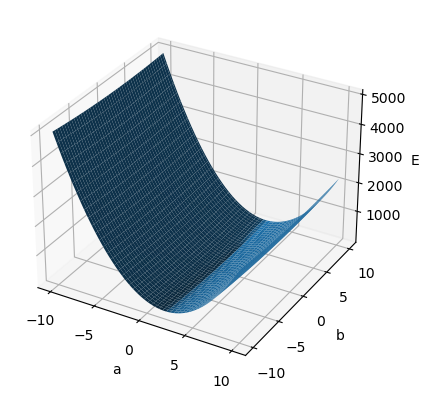

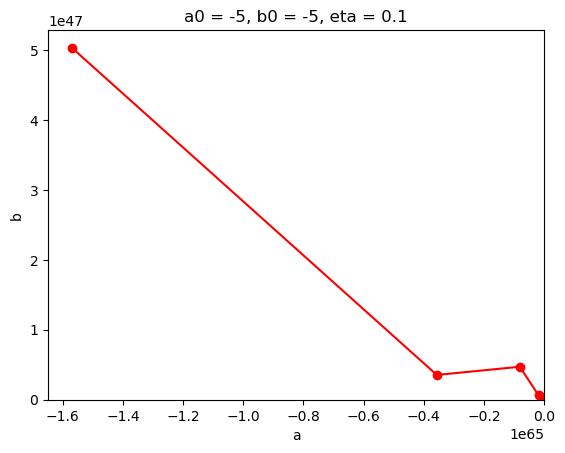

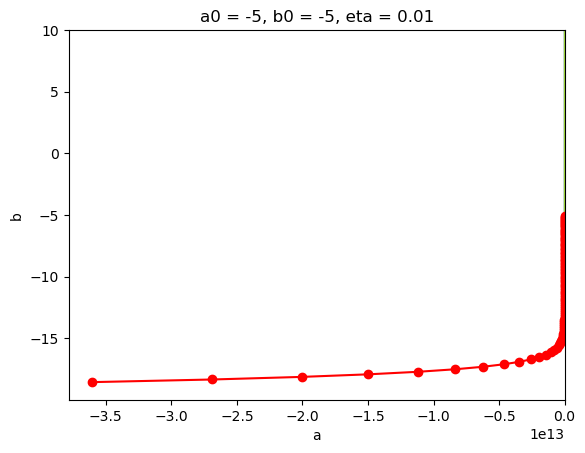

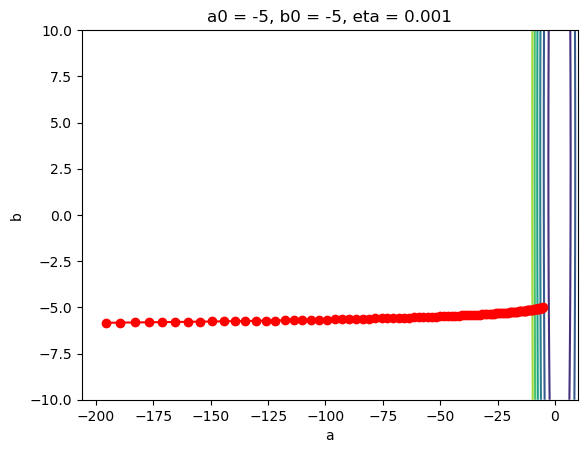

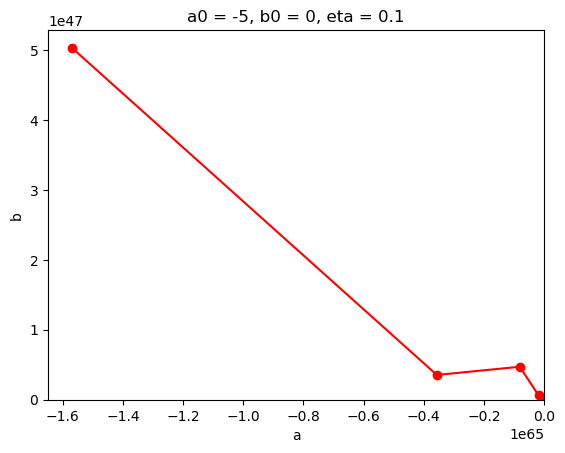

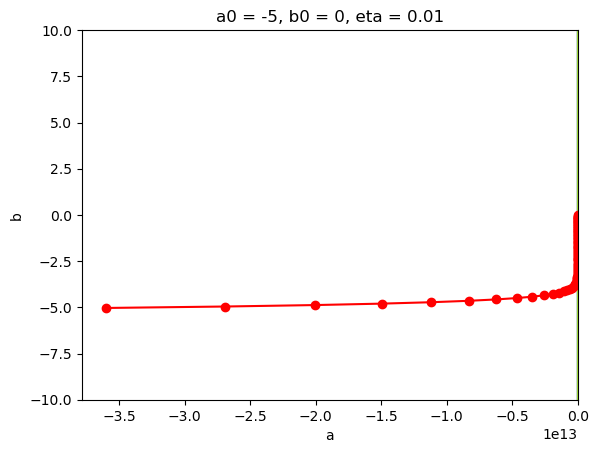

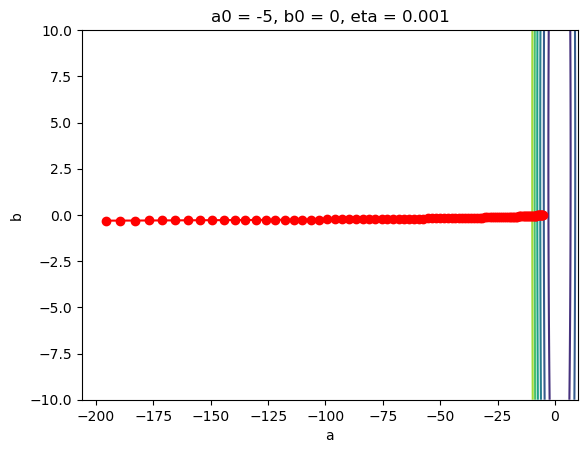

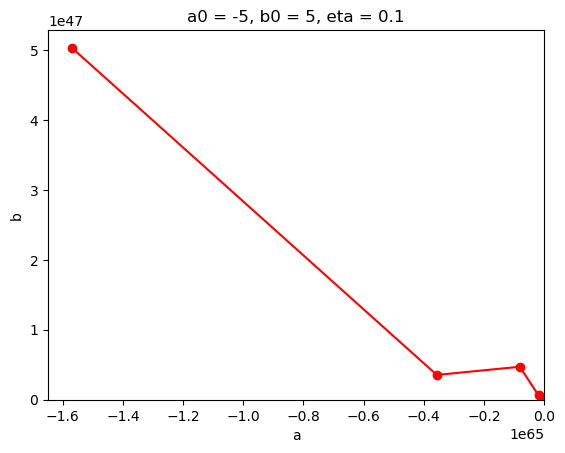

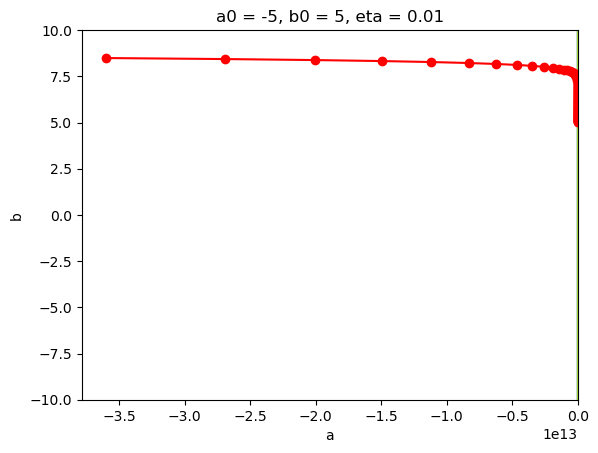

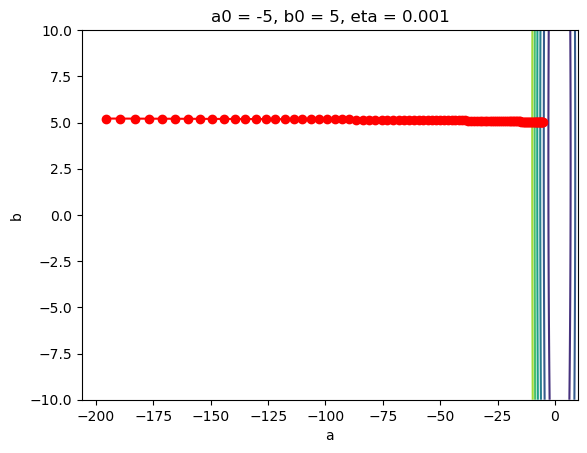

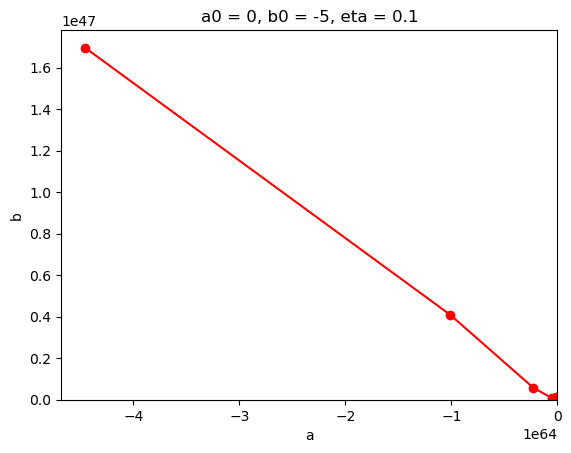

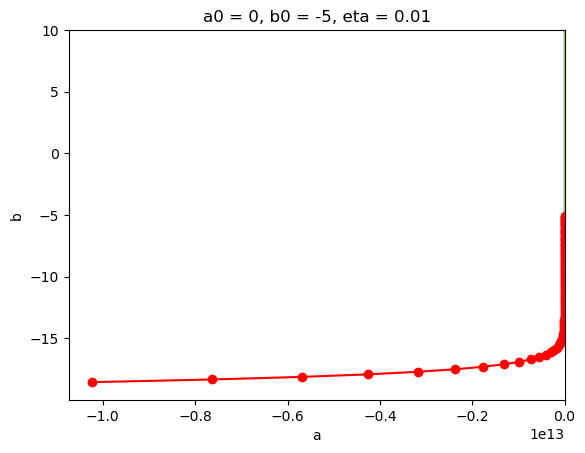

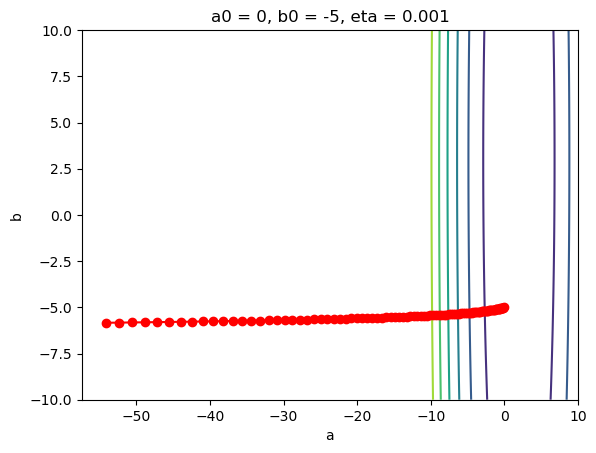

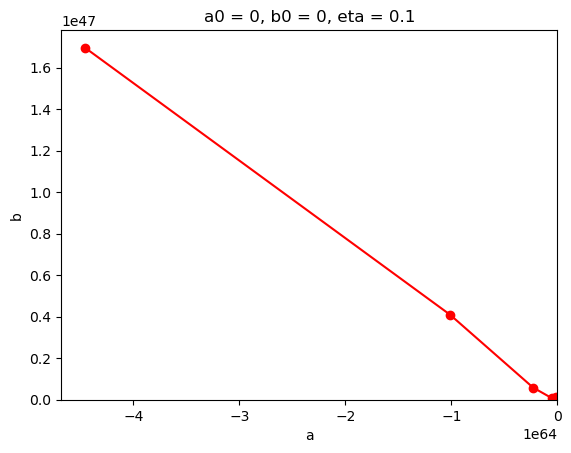

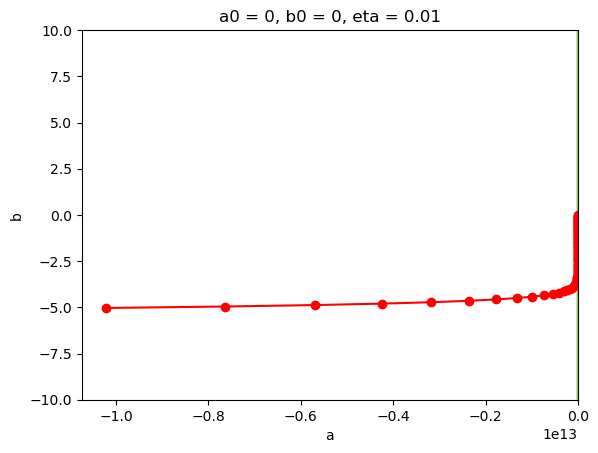

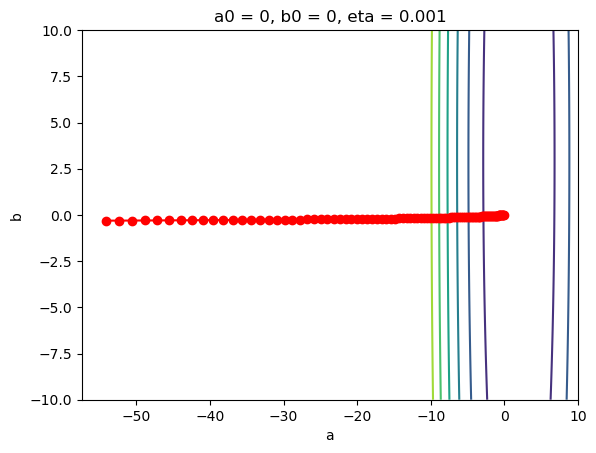

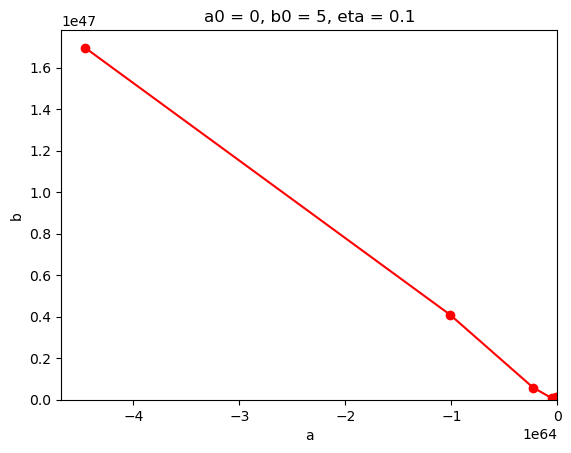

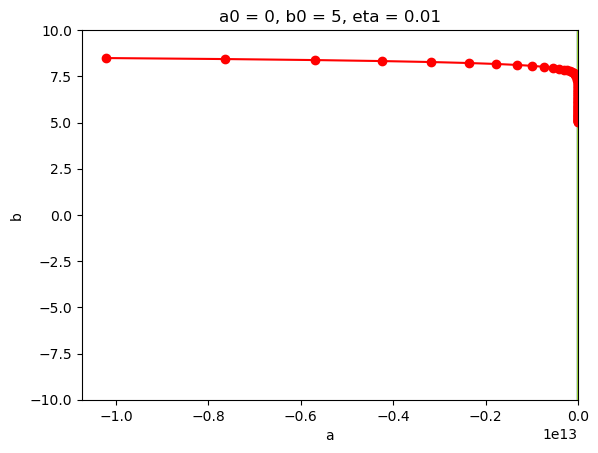

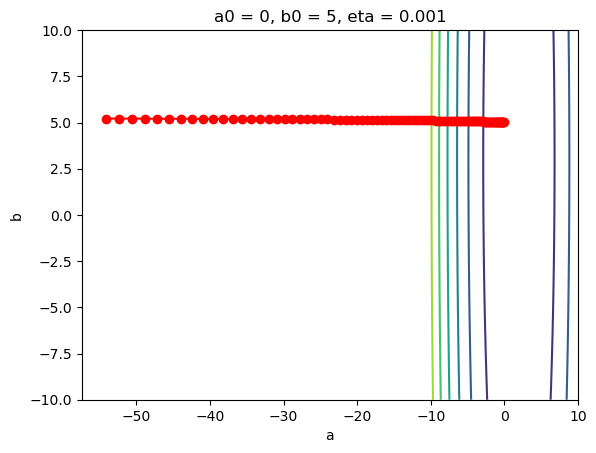

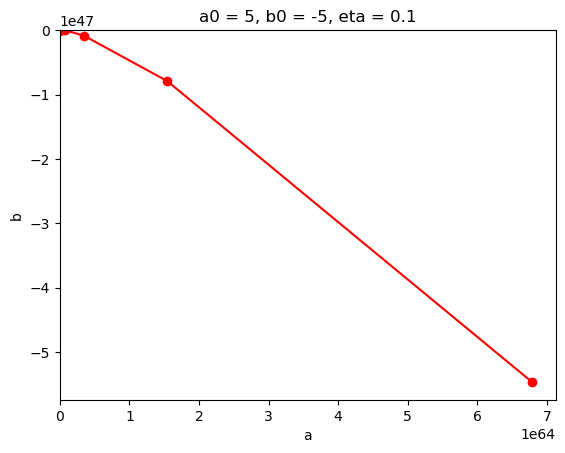

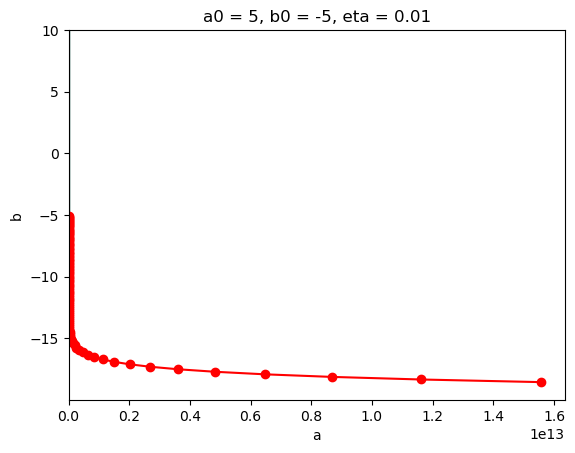

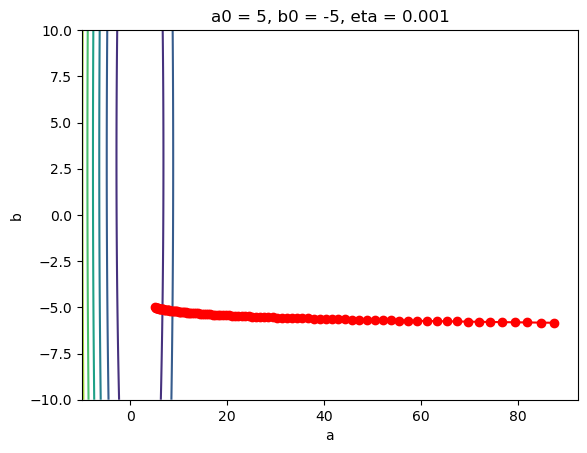

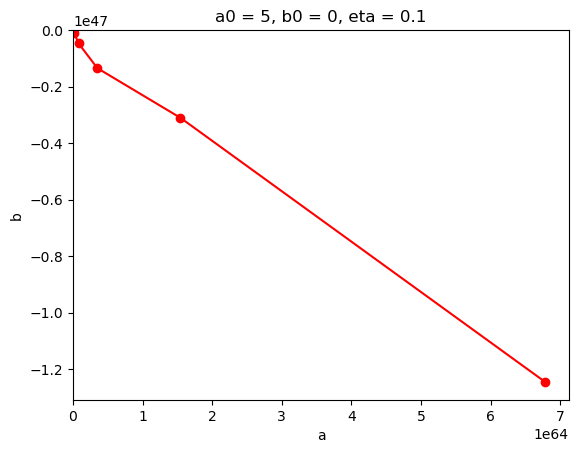

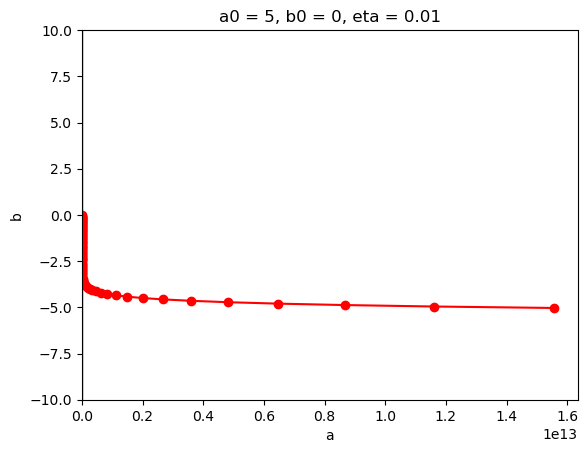

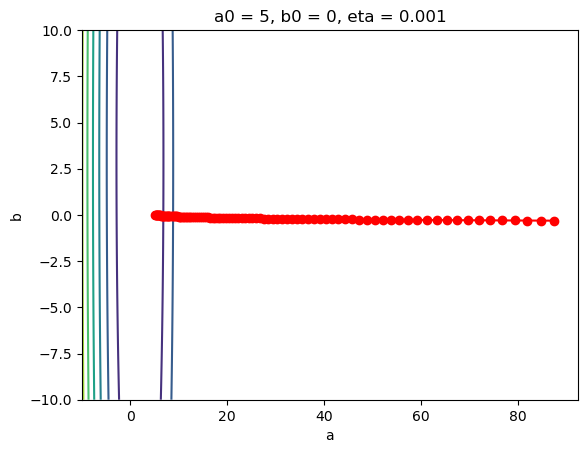

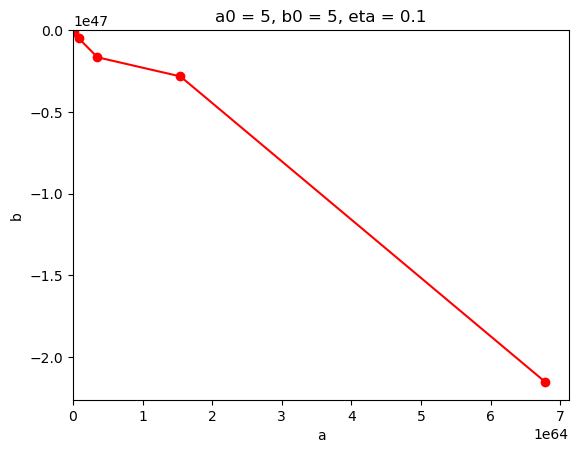

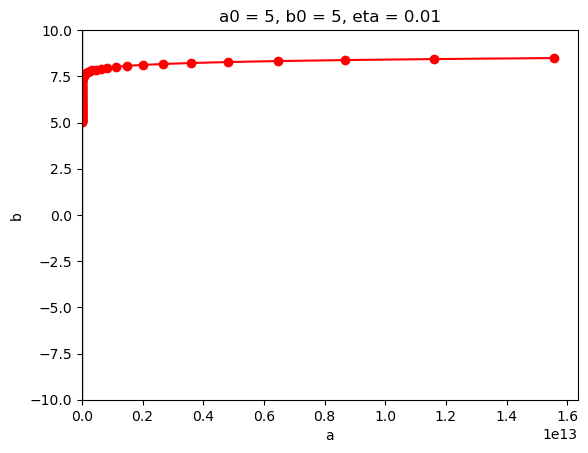

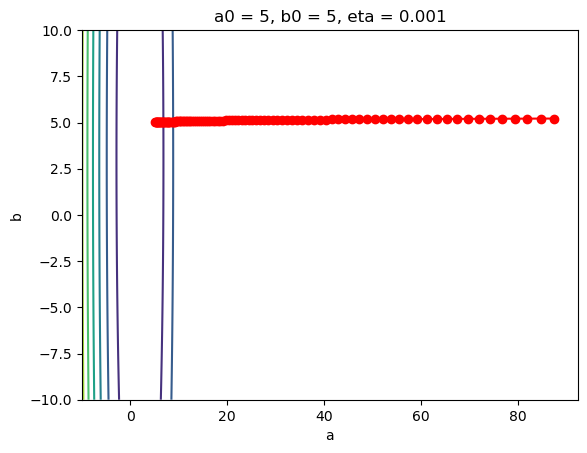

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generating the dataset
a = 2
b = 3
n = 100
x = np.linspace(-10, 10, n)
y = a * x + b + np.random.normal(0, 1, n)

# Gradient descent
def gradient_descent(x, y, a, b, eta, iterations):
    m = len(y)
    for i in range(iterations):
        y_pred = a * x + b
        error = y - y_pred
        a = a - (eta / m) * np.sum(error * x)
        b = b - (eta / m) * np.sum(error)
    return a, b

# Plotting the error surface
a_vals = np.linspace(-10, 10, 100)
b_vals = np.linspace(-10, 10, 100)
a_mesh, b_mesh = np.meshgrid(a_vals, b_vals)
error_surface = np.zeros_like(a_mesh)
for i in range(100):
    for j in range(100):
        a = a_mesh[i, j]
        b = b_mesh[i, j]
        y_pred = a * x + b
        error = y - y_pred
        error_surface[i, j] = np.mean(error ** 2)

# Plotting the error surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(a_mesh, b_mesh, error_surface)
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.set_zlabel("E")
plt.show()

# Running gradient descent for different initial values and update rates
a0_vals = [-5, 0, 5]
b0_vals = [-5, 0, 5]
eta_vals = [0.1, 0.01, 0.001]
iterations = 100
trajectory = np.zeros((len(a0_vals), len(b0_vals), len(eta_vals), iterations, 2))
for i, a0 in enumerate(a0_vals):
    for j, b0 in enumerate(b0_vals):
        for k, eta in enumerate(eta_vals):
            a = a0
            b = b0
            for l in range(iterations):
                a, b = gradient_descent(x, y, a, b, eta, 1)
                trajectory[i, j, k, l, 0] = a
                trajectory[i, j, k, l, 1] = b

# Plotting the trajectory of the solutions on the contour plot of E
for i, a0 in enumerate(a0_vals):
    for j, b0 in enumerate(b0_vals):
        for k, eta in enumerate(eta_vals):
            fig = plt.figure()
            ax = fig.add_subplot(111)
            ax.contour(a_mesh, b_mesh, error_surface)
            ax.plot(trajectory[i, j, k, :, 0], trajectory[i, j, k, :, 1], 'r-o')
            ax.set_xlabel("a")
            ax.set_ylabel("b")
            plt.title("a0 = {}, b0 = {}, eta = {}".format(a0, b0, eta))
            plt.show()
